# **Airplanes Explanatory Data Analysis & Modeling**
In the following notebook we achive a 0.94 training accuracy and 0.92 testing accuracy by using Decision Trees Classifier.
In this Notebook we will try to predict if a customer is satisfied or not.
We will start by doing explanatory analysis to our dataset and then we will prepare the data for modeling.
The machine learning algorithms we will be used in this notebook is the following.
- Logistic Regression.
- Regularization Logistic Regression.
- Decission Trees Classifier.
- Random Forest Classifier.
- Gradient Boosting Classifier. 
- Artificial Neural Network.

We will also evaluate each model by using different metrics, such as Confusion Matrix, Recall, precision and F1 score. 
Finally, we will apply PCA for dimensional reduction.

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

import warnings 
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv").drop(['Unnamed: 0', 'id'],axis = 1)
df.head()


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# **STEP 1: Data Preparation and EDA**
## Check for duplicates and null values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [4]:
if df.duplicated().empty:
    print("We have duplicates")
    df.drop_duplicates(inplace = True)
else:
    print("We don't have duplicates ")

if df.isna().any().any():
    print("We have missing values")
    df.dropna(inplace = True)
else:
    print("We don't have missing values")

We don't have duplicates 
We have missing values


In [5]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Let's do some exploration about the target feature.

<Axes: >

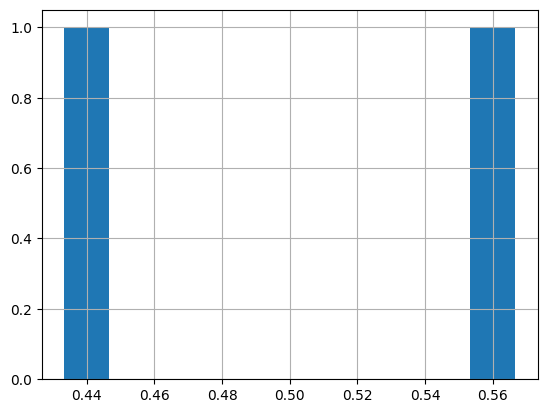

In [6]:
# We can see that our target is very balance, so we will not use some technique for balancing data.
df['satisfaction'].value_counts(normalize = True).hist()

## Explore the numeric variables.
### We will visualize with box plots the differences between the two catecories  in every features.
### If we saw that the mean values are significally difference between the classes, this means that this features will help us for predictions.

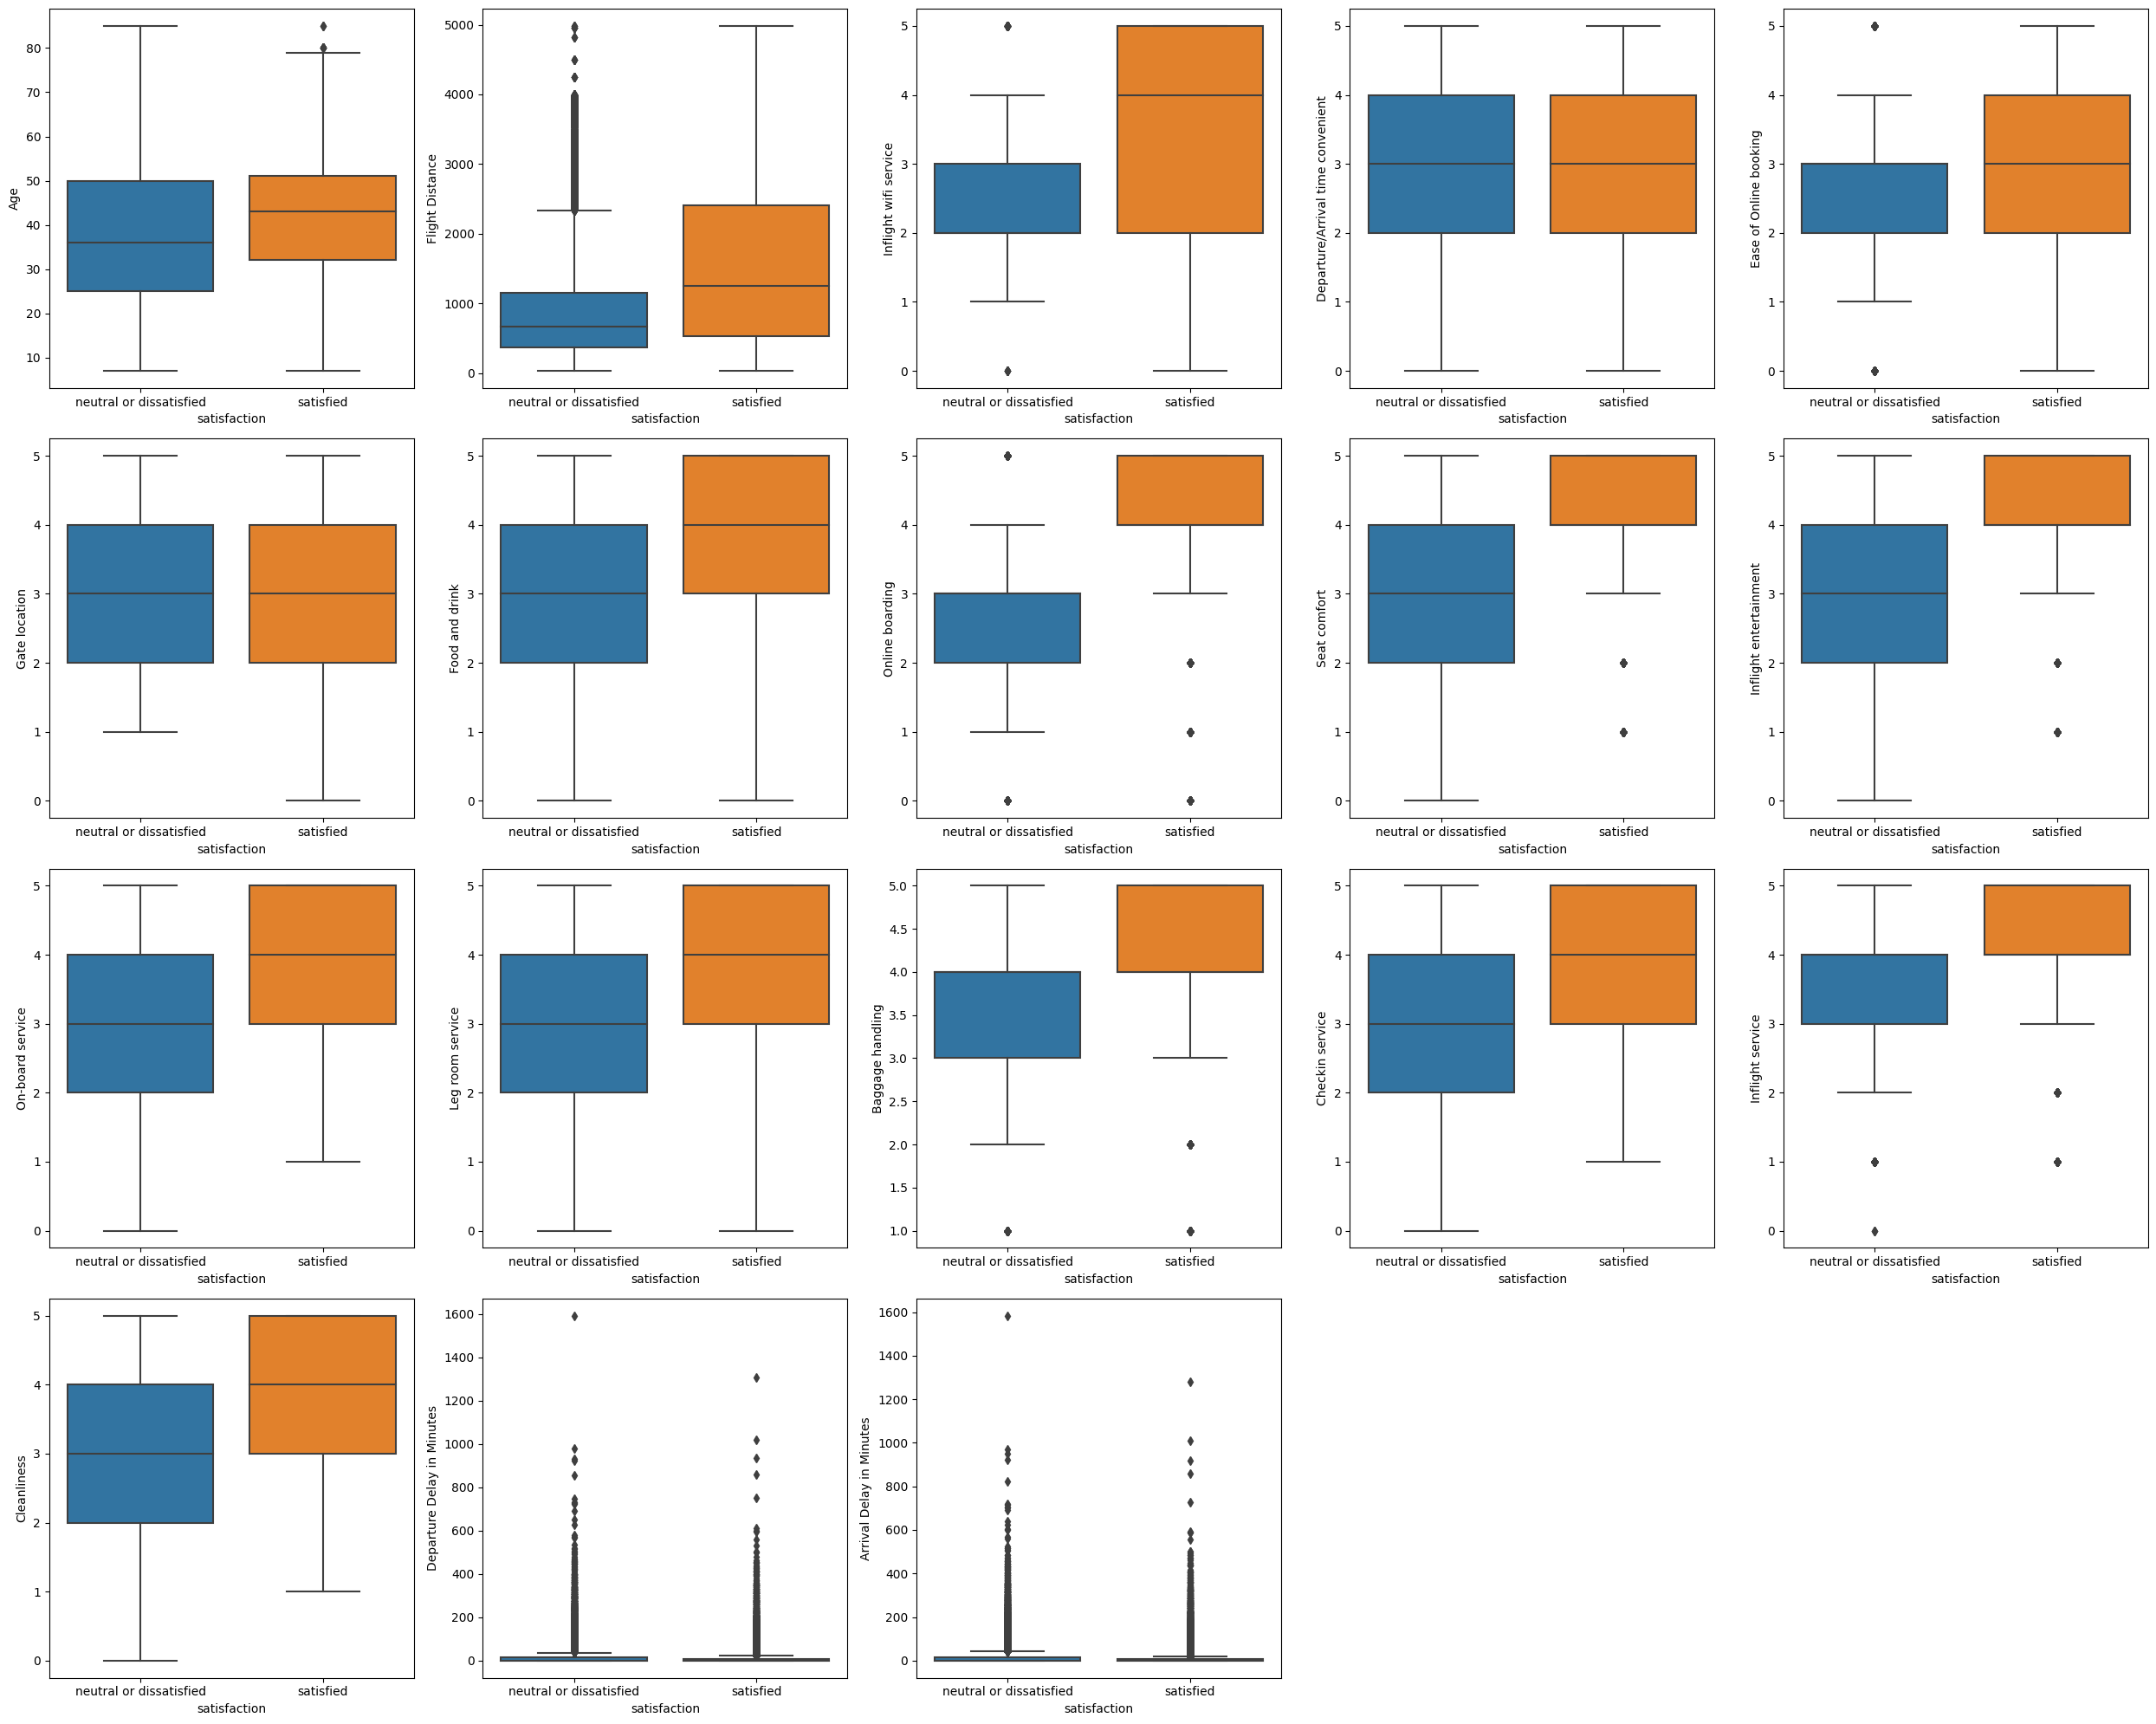

In [7]:
# Create lists with the numeric and categorical columns
numerical_columns = df.select_dtypes(include=["int", "float"]).columns.to_list()
categorical_columns = df.select_dtypes(include = ['object']).columns


def num_plotter(data, target):
   # Select numeric columns
    import math

    # Number of plots
    n_plots = len(numerical_columns)

    # Calculate number of rows needed
    n_cols = 5
    n_rows = math.ceil(n_plots / n_cols)

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))

    # Flatten axes array for easy iteration
    axes = axes.flatten()

    # Plot each numeric column
    for ax, col in zip(axes, numerical_columns):
        sns.boxplot(data=data, x=target, y=col, ax=ax)

    # Remove empty subplots
    for ax in axes[n_plots:]:
        ax.remove()

    # Display the plots
    plt.tight_layout()
    plt.show()
        
num_plotter(df, "satisfaction")

## Check the distribution of the numerical columns

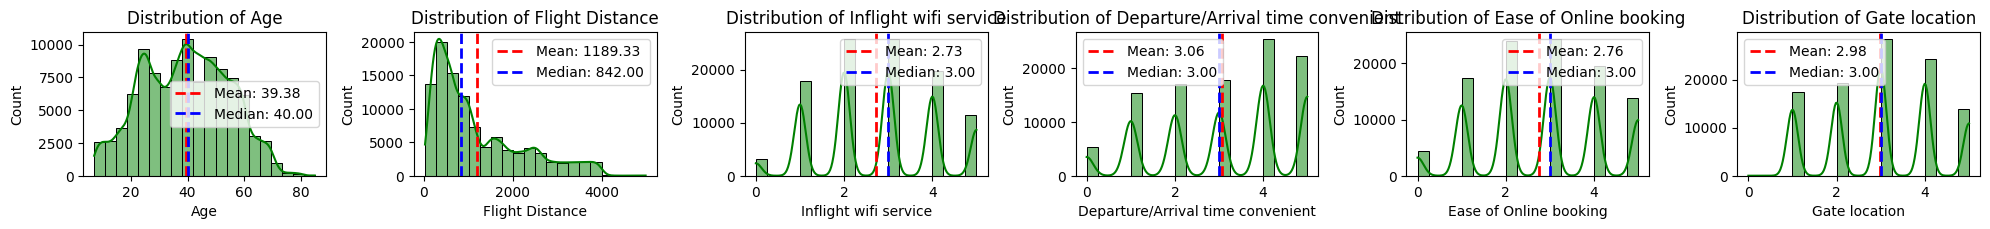

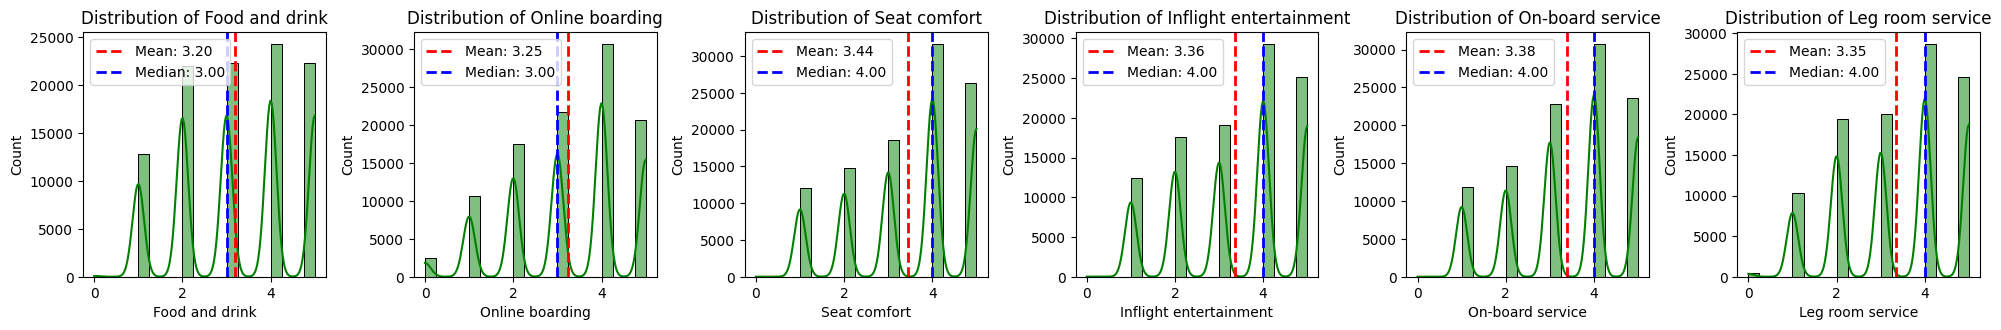

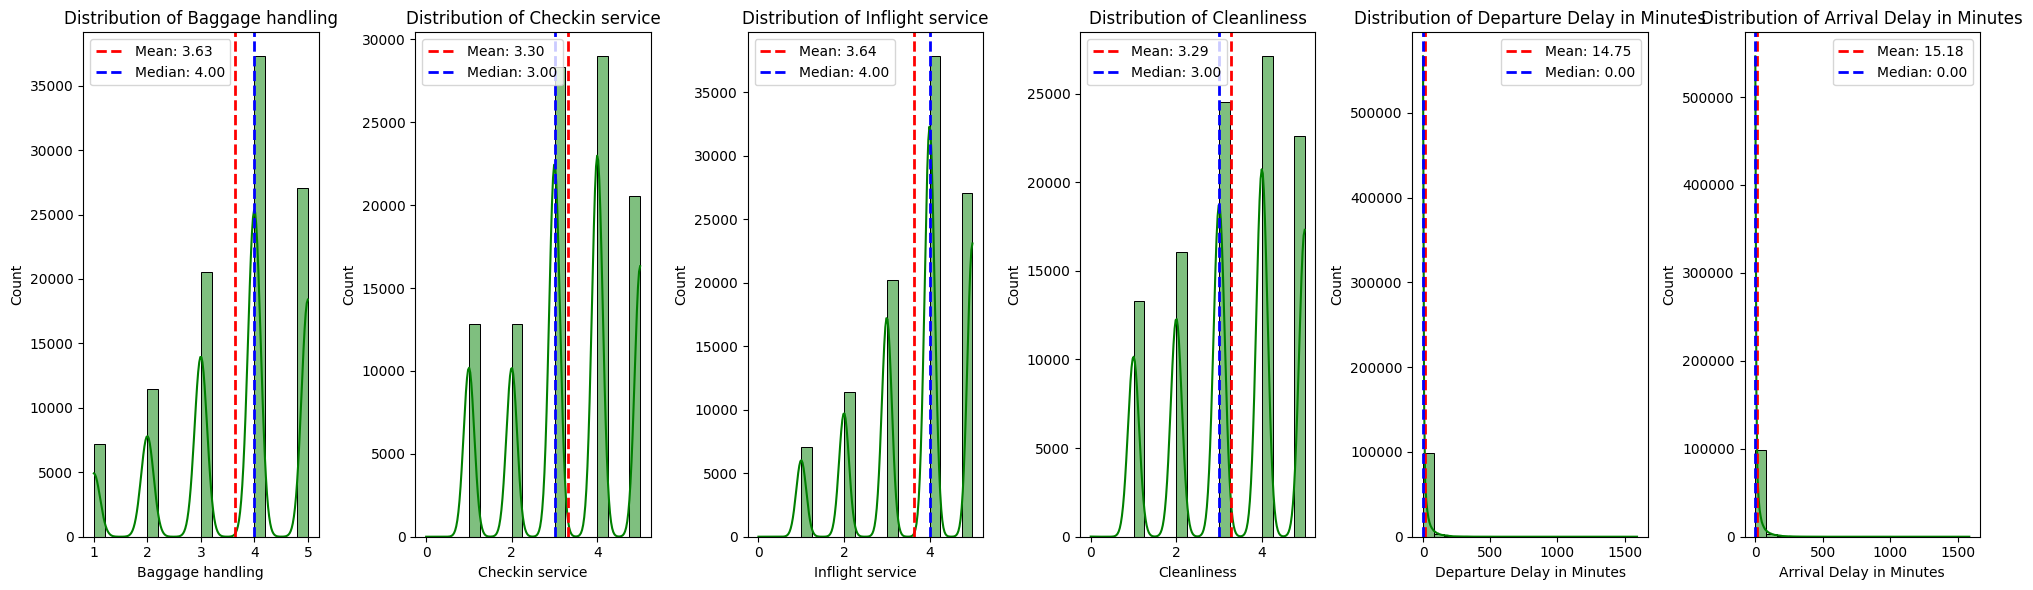

In [14]:
numerical_columns = df.select_dtypes(include=('int', 'float')).columns.to_list()
columns_per_figure = 6
num_numerical_columns = len(numerical_columns)


# Loop through numerical columns and plot distributions
for i in range(0, len(numerical_columns), columns_per_figure):
    columns_subset = numerical_columns[i:i+columns_per_figure]
    
    # Create a new figure
    plt.figure(figsize=(20, 6))
    
    for j, column in enumerate(columns_subset, start=1):
        plt.subplot((num_numerical_columns - i - 1) // columns_per_figure + 1, columns_per_figure, j)
        
        # Check the distribution of each numerical column
        sns.histplot(data=df, x=column, bins=20, color='green', edgecolor='black', kde=True)
        
        # Calculate mean and median
        mean_value = df[column].mean()
        median_value = df[column].median()
        
        # Add mean and median lines
        plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
        plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
        
        # Set title and labels
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.legend()
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the figure
    plt.show()

## From the above results, some features has the same mean between the two classes, so maybe will not help us for predictions.
## Now let's see if we have outliers in our features.


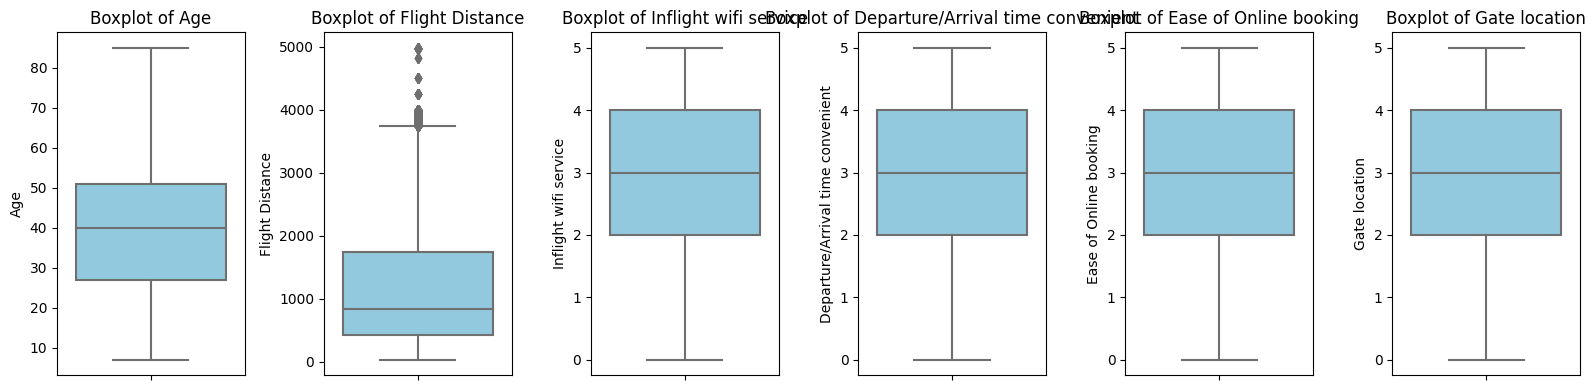

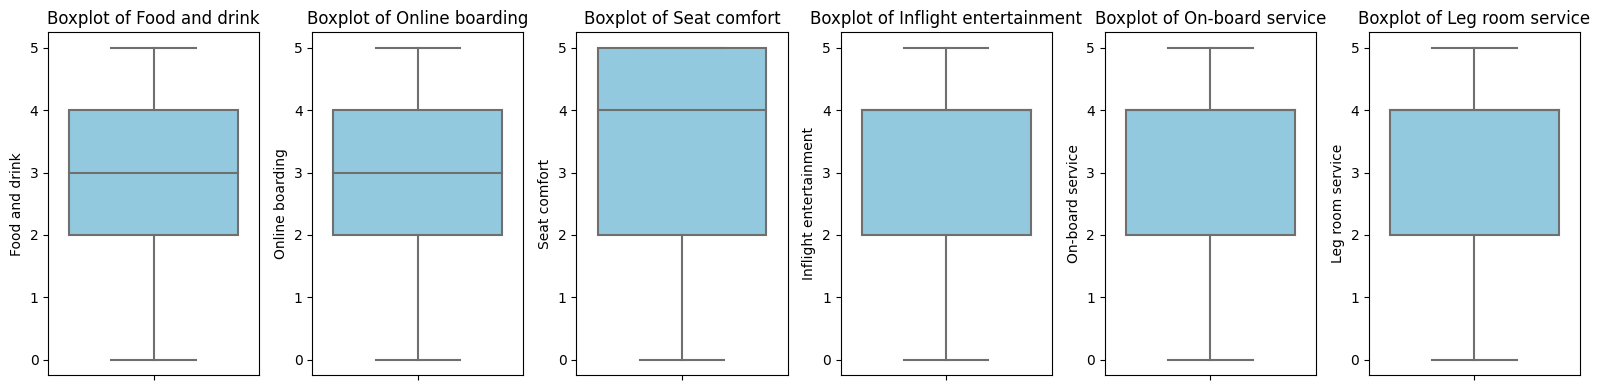

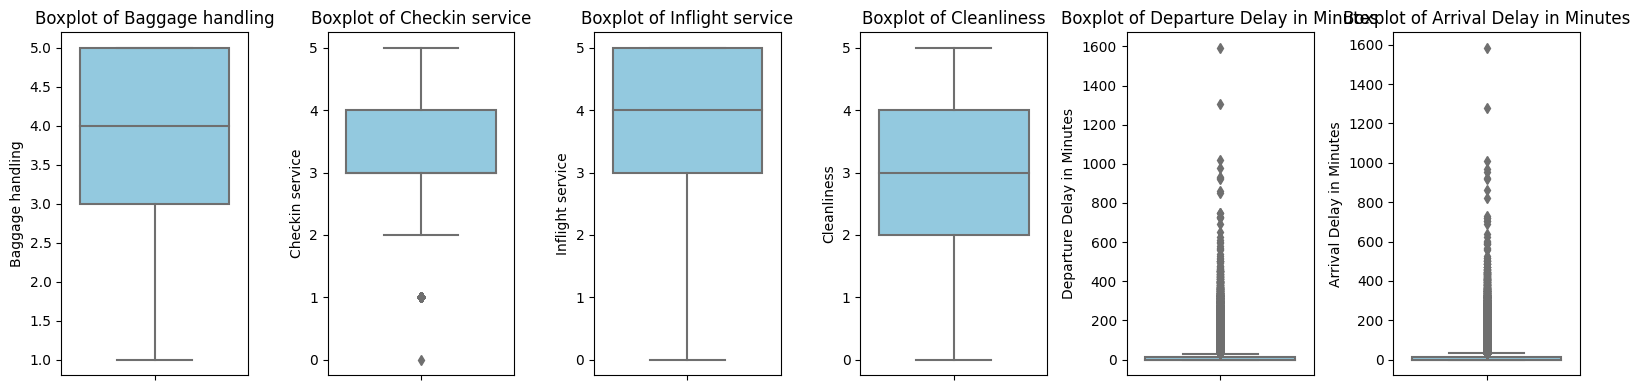

In [13]:
columns_per_figure = 6
# Loop through numerical columns and plot distributions
for i in range(0, len(numerical_columns), columns_per_figure):
    columns_subset = numerical_columns[i:i+columns_per_figure]
    
    # Create a new figure for boxplots
    plt.figure(figsize=(16, 4))
    
    for j, column in enumerate(columns_subset, start=1):
        plt.subplot((len(columns_subset) - 1) // columns_per_figure + 1, columns_per_figure, j)
        
        # Plot boxplot for each numerical column
        sns.boxplot(data=df, y=column, color='skyblue')
        
        # Set title and labels
        plt.title(f"Boxplot of {column}")
        plt.ylabel(column)
        plt.xlabel("")
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the figure
    plt.show()

### We have some outliers in some features, we will leave them because we have many data.
### If we have some problem we will come back and fixed them.

## Explore categorical features.

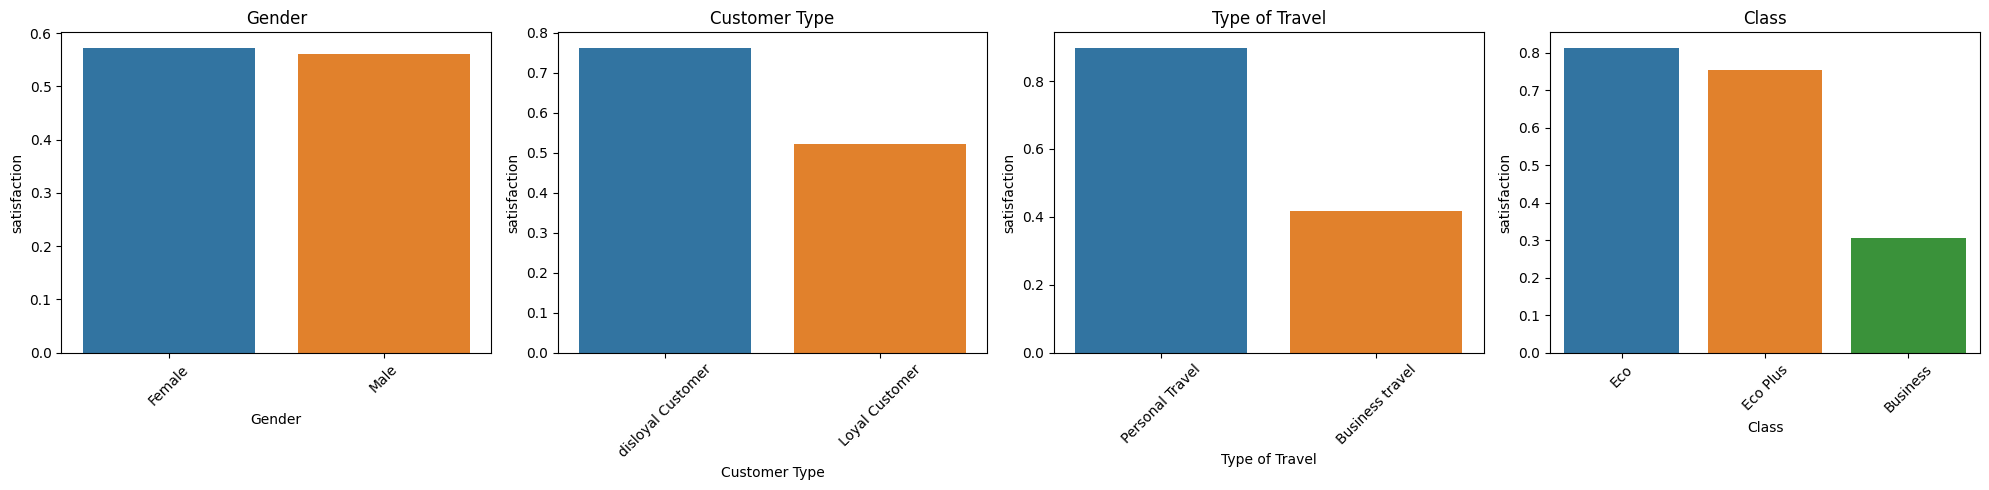

In [11]:
df['satisfaction'] = np.where(df['satisfaction'] == 'neutral or dissatisfied', 1, 0)

def cat_plotter(data, target):
    cat_columns = data.select_dtypes(['object']).columns
    num_plots = len(cat_columns)
    rows = (num_plots // 4) + (num_plots % 4 > 0)
    
    fig, axes = plt.subplots(nrows=rows, ncols=4, figsize=(20, 5 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_columns):
        aggregated_data = (
            data
            .groupby(col, as_index=False)
            .agg({target: 'mean'})
            .sort_values(by=target, ascending=False)
        )
        sns.barplot(
            data=aggregated_data,
            x=col,
            y=target,
            ax=axes[i]
        )
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
        axes[i].set_title(col)
    
    # Remove any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Call the function with your DataFrame and target column
cat_plotter(df, "satisfaction")

## Data Preparation

In [12]:
# Corrected list of columns to be one-hot encoded
onehotencoder_columns = ['Gender', 'Type of Travel', 'Customer Type','Class']

# Define the transformer
transformer = ColumnTransformer([
    ('Categorical_OneHotEncoder', OneHotEncoder(drop = 'first'), onehotencoder_columns),
    ])

# Apply the transformation
transformed_array = transformer.fit_transform(df)

# Convert the result back to a DataFrame
encoded_columns = transformer.named_transformers_['Categorical_OneHotEncoder'].get_feature_names_out(onehotencoder_columns)
transformed_df = pd.DataFrame(transformed_array, columns=encoded_columns)

# Drop the original categorical columns from the original DataFrame
df_dropped = df.drop(columns=onehotencoder_columns)

# Concatenate the original DataFrame (without the dropped columns) with the new one-hot encoded DataFrame
final_df = pd.concat([df_dropped, transformed_df], axis=1)
final_df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Eco,Class_Eco Plus
0,13.0,460.0,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,5.0,5.0,25.0,18.0,1.0,1.0,1.0,0.0,0.0,1.0
1,25.0,235.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,...,4.0,1.0,1.0,6.0,1.0,1.0,0.0,1.0,0.0,0.0
2,26.0,1142.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,...,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25.0,562.0,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,...,4.0,2.0,11.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0
4,61.0,214.0,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,...,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Correlation matrix

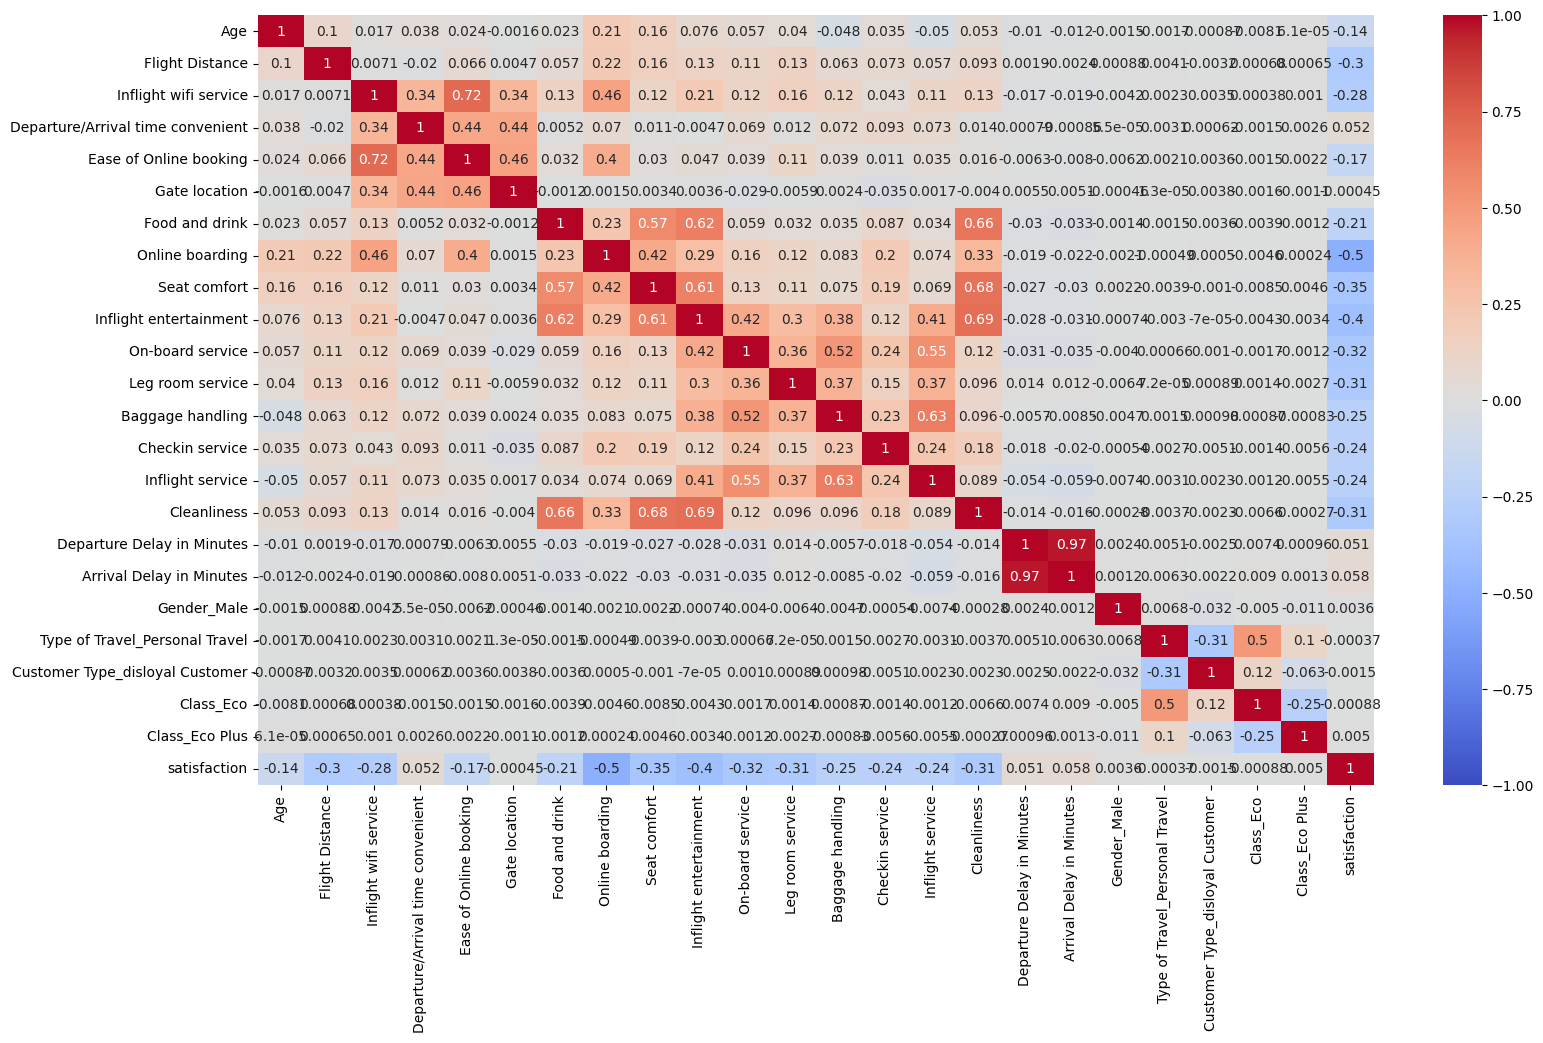

In [13]:
# Assuming `final_df` is your DataFrame
columns = list(final_df.columns)

# Move 'satisfaction' to the end
columns.remove('satisfaction')
columns.append('satisfaction')

# Reorder the DataFrame
final_df = final_df[columns]

# Set the figure size
plt.figure(figsize=(18, 10))

# Create the heatmap
sns.heatmap(final_df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

# Display the plot
plt.show()

## Feature Selection

In [14]:
# From all the Explanatory Data Analyssis we perform, the following columns maybe is not good predictors for our models
columns_to_drop = ['Age',
                   'Gender',
                  ' Gate location',
                  'Departure/Arrival time convenient',
                  'Arrival Delay in Minutes',
                  'satisfaction']

# We will try many times if some of the remaining features will help us
final_df.dropna(inplace= True)

# **STEP 2: Logistic Regression**
## We will use the Logistic regrssion algorithm. Logistic Regression is a great algorithm for first approach for a machine learning classification problem.
## At first we will start by applying the algorithm for all the features. Then we will try to improve the model by using Regularization  techniques and will also try to perform cross validation.

## Let's create the independent and dependent variable. We also will split the data in training and testing set.

In [15]:
X = final_df.drop(['satisfaction'],axis = 1)
y = final_df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)


## We use the Logistic Regression fro prediction. We also calculate some metrics for our acuuracy.
## The training and test accuracy is the same, so we can say that our model is not overfitting but we will apply some methods to improve our models accuracy.

In [16]:
logreg = LogisticRegression()

logreg.fit(X_train,y_train)

print(f"Training accuracy: {logreg.score(X_train,y_train)}")
print(f"Test accuracy: {logreg.score(X_test,y_test)}")

Training accuracy: 0.7263364275599985
Test accuracy: 0.7207242097109938


## Let's try cross validation to the model.
## Based on the following results, the mean validation score and the testing accuracy is the same, so we can say that our model is not overfitting or underfitting


In [17]:
from sklearn.model_selection import KFold


X_one, X_test, y_one, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=2024)
kf = KFold(n_splits=5, shuffle=True, random_state=2023)


# Create a list to store validation scores for each fold
cv_lm_r2s = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = LogisticRegression().fit(X_train,y_train)
    # Append Validation score to list 
    cv_lm_r2s.append(accuracy_score(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")
print(f"Test accuracy: {logreg.score(X_test,y_test)}")

All Validation R2s:  [0.748, 0.75, 0.75, 0.748, 0.751]
Cross Val R2s: 0.749 +- 0.001
Test accuracy: 0.7224669603524229


## Let's calculate some other statistics to understand our prediction.
## First of all, we calculate the confusion matrix. This metric tells us who the models perform, based on positive or negative prediction made.

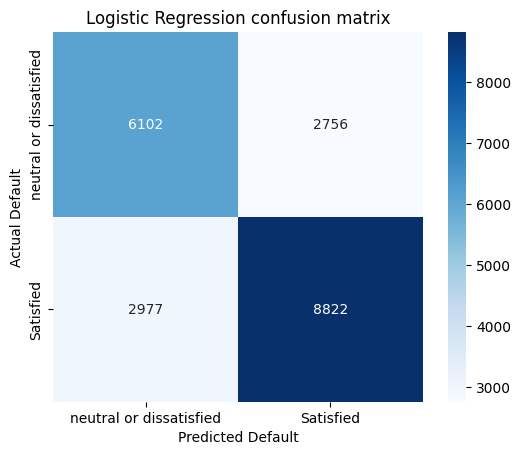

In [18]:
logistic_confusion= confusion_matrix(y_test, logreg.predict(X_test))

# Visualize the results by using a heeatmap. 
sns.heatmap(
    logistic_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["neutral or dissatisfied", "Satisfied"],        
    yticklabels=["neutral or dissatisfied", "Satisfied"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='Logistic Regression confusion matrix'
);

## Let's calculate some metrics to see the accuracy of the model.
## We will calculate three metrics:
- Precission Score: Calculates the percentage of predicted positives classified correctly. 
- Recall Score: Calculates the percentage of actual poritives were correctly classified.
- F1 Score: Is a metric based on the Precission and Recall Scores.


In [19]:
print(f"Precission score: {precision_score(y_test, logreg.predict(X_test))}")
print(f"Recall score: {recall_score(y_test, logreg.predict(X_test))}")
print(f"F1 socre: {f1_score(y_test, logreg.predict(X_test))}")

Precission score: 0.7619623423734669
Recall score: 0.7476904822442579
F1 socre: 0.7547589511057878


# Regularization Logistic Regression
## We will perform some validation testing, and also we will use many different penalties. Also we will try Lasso and Ridge
## Frist of all, we need to scale our data, because regurilazation can only be performed in scaled data.

In [20]:
# First we will scale our dataset
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state = 42)

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Define some parameters. 
parameters = {
    "C": np.linspace(.1, 1.1, 11),
    "penalty": ["l1", "l2"],
}

# Find the best parameters for our model by using the cros validation.
gridsearch = GridSearchCV(LogisticRegression(solver="saga", max_iter=1000), parameters)

gridsearch.fit(X_train_std, y_train)

gridsearch.best_params_

{'C': 0.1, 'penalty': 'l1'}

## We will apply Lasso Regularization to our Logistic Regression and we will calculate the Accuracy.


In [21]:
logreg = LogisticRegression(C=0.1, penalty='l2', solver="saga", max_iter=1000)

lr = logreg.fit(X_train_std, y_train)

print(f"Train Accuracy: {lr.score(X_train_std, y_train)}")
print(f"Test Accuracy: {lr.score(X_test_std, y_test)}")

Train Accuracy: 0.8289179081898169
Test Accuracy: 0.8252408384566975


## The accuracy is bigger that the previous model, so we think that our model is better.
## Let's calculate some other metrics to determine if our model is better.

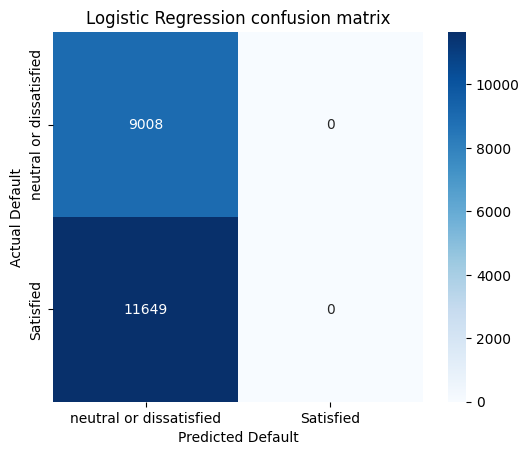

In [22]:
logistic_confusion= confusion_matrix(y_test, lr.predict(X_test))

sns.heatmap(
    logistic_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["neutral or dissatisfied", "Satisfied"],        
    yticklabels=["neutral or dissatisfied", "Satisfied"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='Logistic Regression confusion matrix'
);

## From the above heatmap we can say that we can predict only the Neutral or Dissatisfied customers.
## We can't predict any Satisfied Customer, so despite the model has bigger accuracy is not better than the previous model.

In [23]:
print(f"Precission score: {precision_score(y_test, lr.predict(X_test))}")
print(f"Recall score: {recall_score(y_test, lr.predict(X_test))}")
print(f"F1 socre: {f1_score(y_test, lr.predict(X_test))}")

Precission score: 0.0
Recall score: 0.0
F1 socre: 0.0


# Logistic Regression with Feature Selection.
## In this section, we will apply Logistic Regression using only some of the features of the dataset.
## After many tries, we create a model based on some features. From now on we will try only this features.

In [24]:
# Let's try the most correlated features with the target feature.
columns_to_drop = ['Age',
                   'Gender_Male',
                  'Gate location',
                  'Departure/Arrival time convenient',
                  'Arrival Delay in Minutes',
                   'Departure Delay in Minutes', 
                   'Type of Travel_Personal Travel',
                   'Customer Type_disloyal Customer',
                   'Class_Eco',
                   'Class_Eco Plus',
                   'Gate location',
                  'satisfaction']

# Create dependent and independent variables.
X = final_df.drop(columns_to_drop, axis =1 )
y = final_df['satisfaction']

In [25]:
X_two, X_test, y_two, y_test = train_test_split(X, y, test_size=.2, random_state=2023)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.25, random_state=2024)
kf = KFold(n_splits=5, shuffle=True, random_state=2023)


# Create a list to store validation scores for each fold
cv_lm_r2s = []

# Loop through each fold in X and y
for train_ind, val_ind in kf.split(X, y):
    # Subset data based on CV folds
    X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
    X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
    # Fit the Model on fold's training data
    model = LogisticRegression().fit(X_train,y_train)
    # Append Validation score to list 
    cv_lm_r2s.append(accuracy_score(y_val, model.predict(X_val),))

print("All Validation R2s: ", [round(x, 3) for x in cv_lm_r2s])
print(f"Cross Val R2s: {round(np.mean(cv_lm_r2s), 3)} +- {round(np.std(cv_lm_r2s), 3)}")



All Validation R2s:  [0.814, 0.75, 0.757, 0.753, 0.809]
Cross Val R2s: 0.776 +- 0.029


## By default, binary classication will predict positive class when the probability is bigger than 0.5, and negative probability when the probablity is lower than 0.5.
## Based on the business problem, we can change the threshold and make more useful predictions. 
## So, we will try many different thresholds and we will se if the models accuracy improves based on the metrics we have used.

Precission score: 0.6780837904072821
Recall score: 0.9849139757606576
F1 socre: 0.8031931437260256


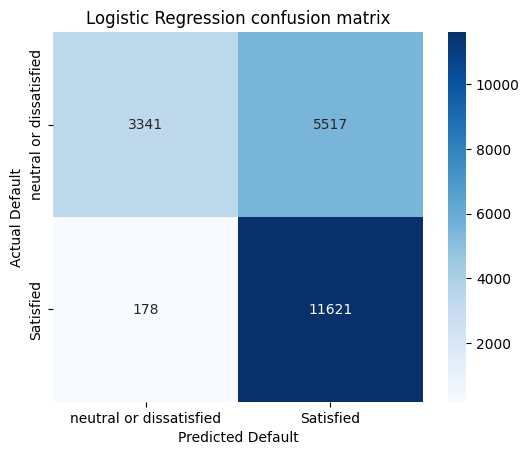

In [26]:
# Define the threshold and change it to see the results.

threshold = 0.2
logistic_confusion= confusion_matrix(y_test, model.predict_proba(X_test)[:,1] >threshold)

# Visualize the results by using a heeatmap. 

sns.heatmap(
    logistic_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["neutral or dissatisfied", "Satisfied"],        
    yticklabels=["neutral or dissatisfied", "Satisfied"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='Logistic Regression confusion matrix'
);

print(f"Precission score: {precision_score(y_test, model.predict_proba(X_test)[:,1] >threshold)}")
print(f"Recall score: {recall_score(y_test, model.predict_proba(X_test)[:,1] >threshold)}")
print(f"F1 socre: {f1_score(y_test, model.predict_proba(X_test)[:,1] >threshold)}")

# Precision recall Curve and AUC. 
## Aftee many tries, we can see that our model hasn't imporve signigically. So we will use the precision recall curve.
## This curve helps us to see the ideal threshold for our model. In the following curve we can see that the best threshold is .46. Let's try that model.

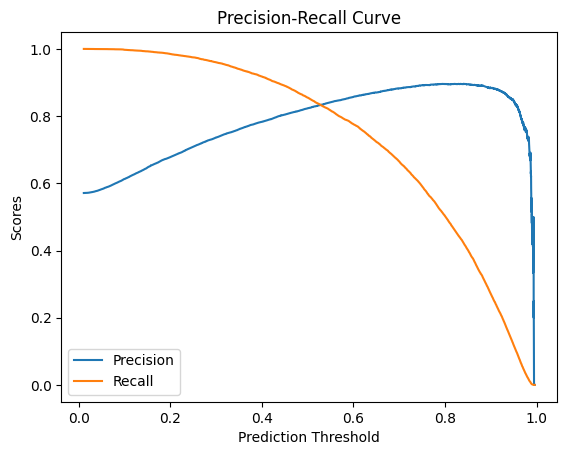

In [27]:
from sklearn.metrics import precision_recall_curve

p_curve , r_curve , t_curve = precision_recall_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(t_curve, p_curve[:-1],label = 'Precision')
plt.plot(t_curve, r_curve[:-1], label = 'Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

Accuracy score: 0.8137193203272498
Precission score: 0.8045193412485637
Recall score: 0.8901601830663616
F1 socre: 0.8451758268286794


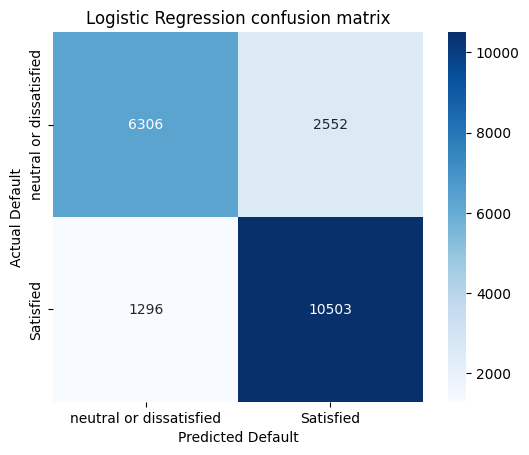

In [28]:
# Define the threshold and change it to see the results.

threshold = 0.45
logistic_confusion= confusion_matrix(y_test, model.predict_proba(X_test)[:,1] >threshold)

# Visualize the results by using a heeatmap. 

sns.heatmap(
    logistic_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["neutral or dissatisfied", "Satisfied"],        
    yticklabels=["neutral or dissatisfied", "Satisfied"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='Logistic Regression confusion matrix'
);
print(f"Accuracy score: {accuracy_score(y_test, model.predict_proba(X_test)[:,1] > threshold)}")
print(f"Precission score: {precision_score(y_test, model.predict_proba(X_test)[:,1] >threshold)}")
print(f"Recall score: {recall_score(y_test, model.predict_proba(X_test)[:,1] >threshold)}")
print(f"F1 socre: {f1_score(y_test, model.predict_proba(X_test)[:,1] >threshold)}")

## We can visualize the F1 score based on different thresholds.

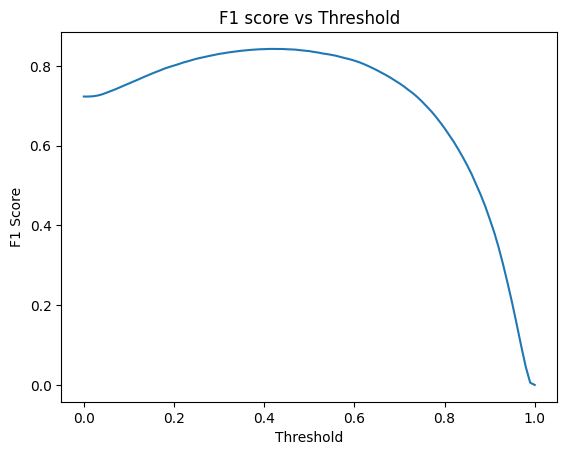

In [29]:
f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(model.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 score vs Threshold')
plt.show()

# **STEP 3:Decision Trees Classifier**
## Training and testing accuracy is close so we can say that our model is not overifitting or underfitting.

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = final_df.drop(['satisfaction'],axis = 1)
y = final_df['satisfaction']
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 42, test_size = .25)

dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train,y_train)

print(f"Accuracy on Train data: {accuracy_score(y_train, dt.predict(X_train))}")
print(f'Accuracy on test data: {accuracy_score(y_test,dt.predict(X_test))}')

Accuracy on Train data: 0.8504834566179983
Accuracy on test data: 0.8493861585531157


## Let's try other metrics

Accuracy score: 0.8493861585531157
Precission score: 0.8609762675296656
Recall score: 0.8748372953346578
F1 socre: 0.8678514390567128


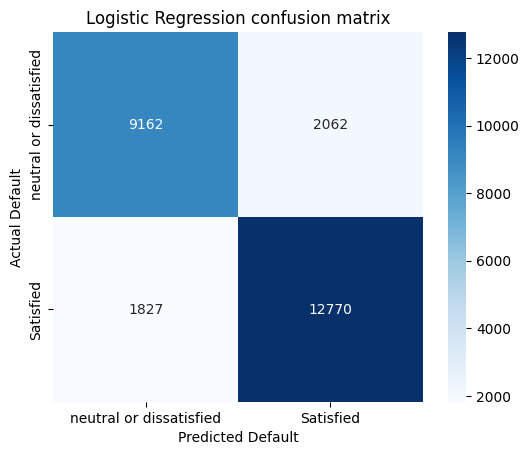

In [31]:
# Define the threshold and change it to see the results.

threshold = 0.45
logistic_confusion= confusion_matrix(y_test, dt.predict_proba(X_test)[:,1] >threshold)

# Visualize the results by using a heeatmap. 

sns.heatmap(
    logistic_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["neutral or dissatisfied", "Satisfied"],        
    yticklabels=["neutral or dissatisfied", "Satisfied"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='Logistic Regression confusion matrix'
);
print(f"Accuracy score: {accuracy_score(y_test, dt.predict(X_test))}")
print(f"Precission score: {precision_score(y_test, dt.predict(X_test))}")
print(f"Recall score: {recall_score(y_test, dt.predict(X_test))}")
print(f"F1 socre: {f1_score(y_test, dt.predict(X_test))}")

## Based on all the metrics, our model is very good.
## At first, let's plot the tree and then try to improve the model.

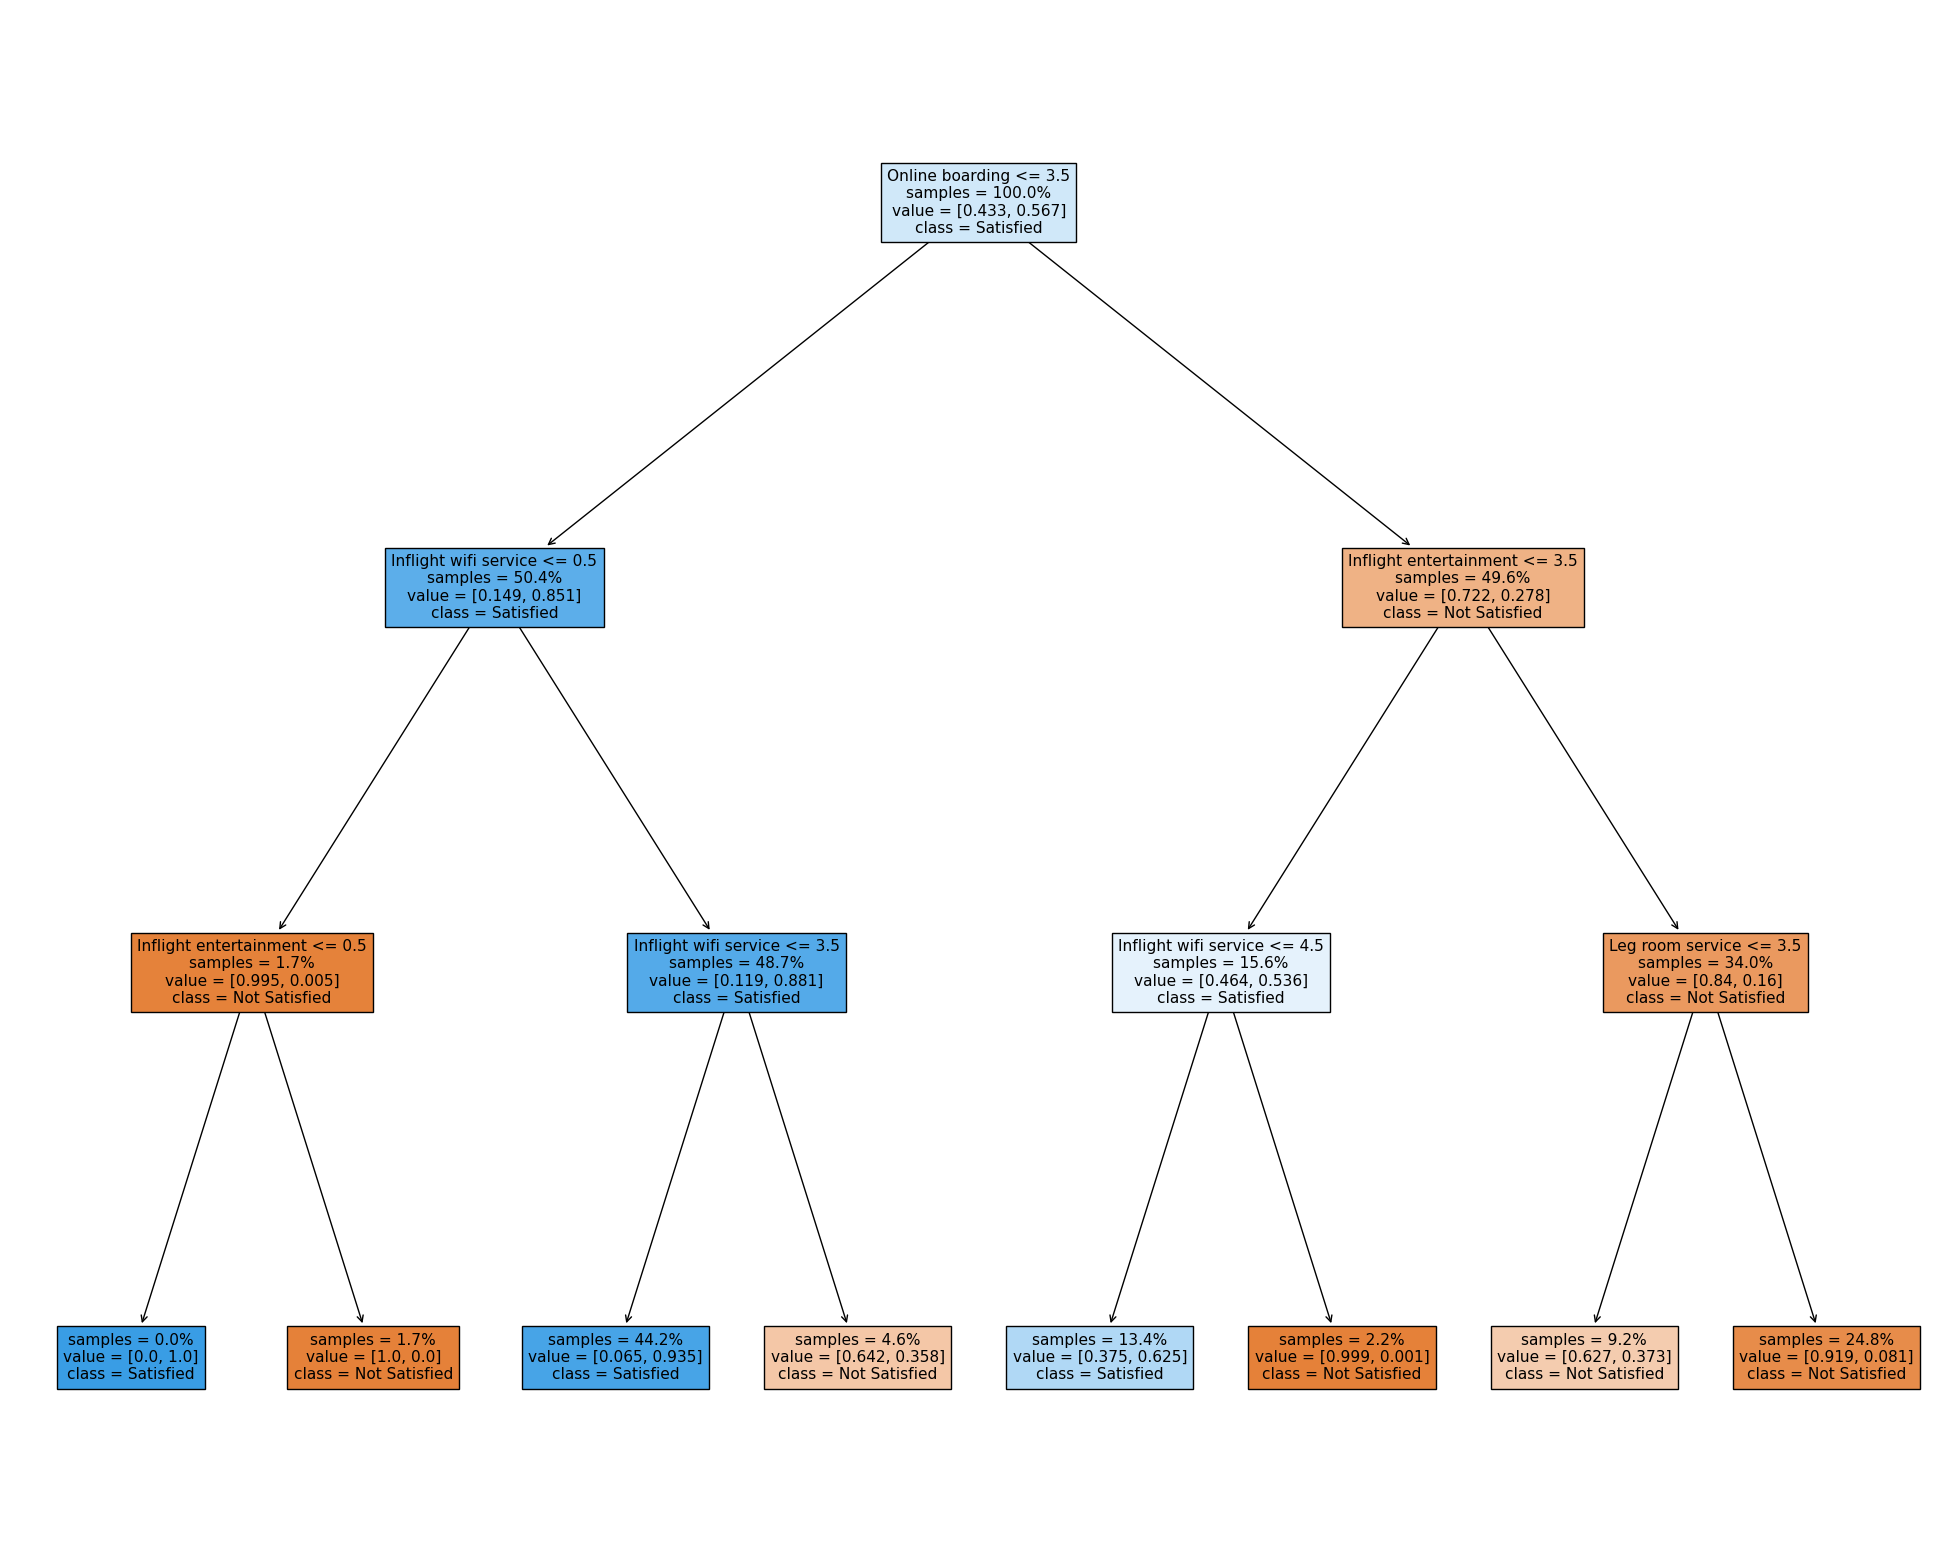

In [32]:
fig = plt.figure(figsize=(25, 20))

plot_tree(
    dt,
    feature_names=list(X_test.columns),
    class_names=["Not Satisfied", "Satisfied"],
    impurity=False,
    proportion=True,
    filled=True
);

## Return the most important columns for our model.

<Axes: xlabel='importance', ylabel='feature'>

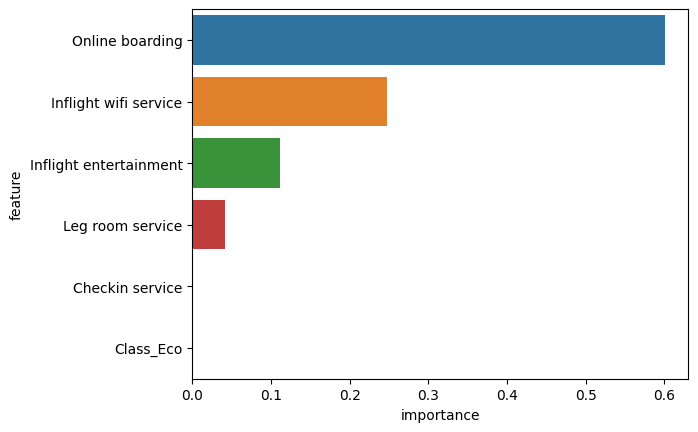

In [33]:
importance_df = (
    pd.DataFrame({
        "feature": X_train.columns, 
        "importance": dt.feature_importances_
    })
    .sort_values("importance", ascending=False)
)

sns.barplot(importance_df[:6], x="importance", y="feature")

## We can say that so columns are not uefull for prediction, from now we will use only this columns for the predictions.
## Lets try change some hyperparameters of the Decision Trees Classifier.

Train Accuracy0.9483366252275279
Test Accuracy: 0.9260679292049108
Test Precision: 0.9300433839479393
Test Recall: 0.9399191614715352


[Text(0.5, 23.52222222222222, 'Predicted Default'),
 Text(77.92222222222226, 0.5, 'Actual Default'),
 Text(0.5, 1.0, 'Logistic Regression confusion matrix')]

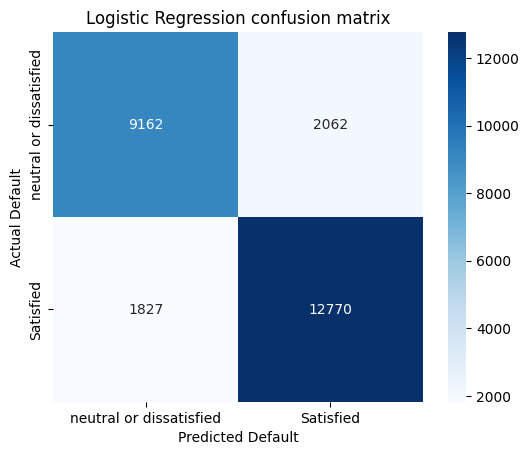

In [34]:
cols_to_use = importance_df.iloc[0:5,0].to_list()
params = {
    "max_depth": [12,14, 16],
    "min_samples_leaf": [6 ,8 ,10 ],
    "criterion": ["gini"]
}

grid = GridSearchCV(DecisionTreeClassifier(), params)

grid.fit(X_train, y_train)

dt = DecisionTreeClassifier(**grid.best_params_)

dt.fit(X_train, y_train)

print(f'Train Accuracy{dt.score(X_train, y_train)}')
print(f"Test Accuracy: {dt.score(X_test, y_test)}")
print(f"Test Precision: {precision_score(y_test, dt.predict(X_test))}")
print(f"Test Recall: {recall_score(y_test, dt.predict(X_test))}")
# Visualize the results by using a heeatmap. 

sns.heatmap(
    logistic_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["neutral or dissatisfied", "Satisfied"],        
    yticklabels=["neutral or dissatisfied", "Satisfied"]
).set(
    xlabel='Predicted Default',
    ylabel='Actual Default',
    title='Logistic Regression confusion matrix'
)



# **STEP 4: Ensemble methods**
## Random Forest Classifier.
## Our training accuracy is perfect, this is very suspicious. Also the test accuracy is high but lower than the training, So we can think that our model is overfitting. 

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_untuned = RandomForestClassifier(random_state=2023, n_jobs=-1)

rf_untuned.fit(X_train, y_train)

print(f"Train Accuracy: {rf_untuned.score(X_train, y_train)}")
print(f"Test Accuracy: {rf_untuned.score(X_test, y_test)}")
print(f"Test Precision: {precision_score(y_test, rf_untuned.predict(X_test))}")
print(f"Test Recall: {recall_score(y_test, rf_untuned.predict(X_test))}")

Train Accuracy: 1.0
Test Accuracy: 0.9443476240269548
Test Precision: 0.9380242311276794
Test Recall: 0.9653353428786737


## Let's check the feature importance of the model.

<Axes: xlabel='importance', ylabel='feature'>

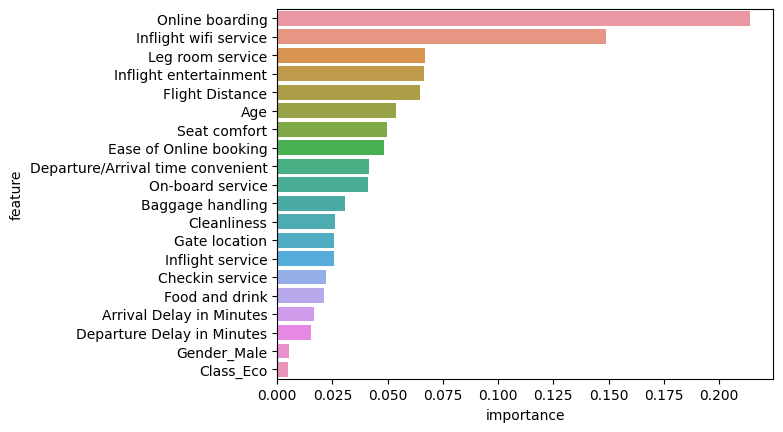

In [36]:
importance = pd.DataFrame(
    {"feature": X_train.columns, 
     "importance": rf_untuned.feature_importances_}
).sort_values("importance", ascending=False).iloc[:20]

sns.barplot(importance, x="importance", y="feature")

## We may create a model and we will drop the hightest important feature.
## By doing this, the model is not perfect, but has very big accuracy. Also the test accuracy drop significally.

In [37]:
X = final_df.drop(['satisfaction','Online boarding', 'Inflight wifi service'],axis = 1)
y = final_df['satisfaction']
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 42, test_size = .25)

rf_untuned = RandomForestClassifier(random_state=2023, n_jobs=-1)

rf_untuned.fit(X_train, y_train)

print(f"Train Accuracy: {rf_untuned.score(X_train, y_train)}")
print(f"Test Accuracy: {rf_untuned.score(X_test, y_test)}")
print(f"Test Precision: {precision_score(y_test, rf_untuned.predict(X_test))}")
print(f"Test Recall: {recall_score(y_test, rf_untuned.predict(X_test))}")

Train Accuracy: 0.9999870906110013
Test Accuracy: 0.8983385616358778
Test Precision: 0.8957947632901349
Test Recall: 0.9281359183393848


In [168]:
from sklearn.model_selection import RandomizedSearchCV
      
rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True, False],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rf, 
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_


KeyboardInterrupt



# **STEP 5: Artificial Neural Network**

# **NOTE** : Need more work.

In [39]:
import tensorflow as tf

# Neural Network need scaled data to be perform
X = final_df.drop(['satisfaction'],axis = 1)
y = final_df['satisfaction']
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 42, test_size = .25)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Building the ANN

In [67]:
ann = tf.keras.models.Sequential()

# First layer
ann.add(tf.keras.layers.Dense(units = 6,activation = 'relu'))

# Second layer
ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))


# Final layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Training the ANN
### After the first try, we can see that the accuracy of the model doesn't increase, so we will drop the epochs from 100 to 25

In [68]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy','f1_score','recall','precision'])
ann.fit(X_train_std, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7845 - f1_score: 0.7223 - loss: 0.4443 - precision: 0.7926 - recall: 0.8415
Epoch 2/50
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8811 - f1_score: 0.7236 - loss: 0.2747 - precision: 0.8873 - recall: 0.9053
Epoch 3/50
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9038 - f1_score: 0.7247 - loss: 0.2241 - precision: 0.9126 - recall: 0.9188
Epoch 4/50
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9090 - f1_score: 0.7247 - loss: 0.2050 - precision: 0.9139 - recall: 0.9274
Epoch 5/50
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9147 - f1_score: 0.7227 - loss: 0.1940 - precision: 0.9201 - recall: 0.9300
Epoch 6/50
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9161 - f1_score: 0.7246 - loss: 0.1902 - precision: 0.9199 - recall: 0.9336
Epoch 7/50
2421/2421 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9180 - f1_score: 0.7251 - loss: 0.1849 - precision: 0.9211 - recall

In [71]:

# Get probabilities
y_pred_prob = ann.predict(X_test)

# Convert probabilities to binary labels
y_pred = (y_pred_prob > 0.5).astype(int)

807/807 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [73]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Accuray test: {accuracy_score(y_test, y_pred)}")
print(f"Test Precision: {precision_score(y_test, y_pred)}")
print(f"Test Recall: {recall_score(y_test, y_pred)}")
print(f"F1-score: {f1_score(y_test,y_pred)}")

[[11224     0]
 [14593     4]]
Accuray test: 0.43483985902947214
Test Precision: 1.0
Test Recall: 0.0002740289100500103
F1-score: 0.0005479076775563317
